# Shunique - Company Background
Shunique is a hot new online women's shoe company that is known for their unique shoe combinations.  Founded by auto tire amgnate Joseph Flatbush and his daugthers Jenna and Jamaica.  He believed that just like car tires, women's shoes should be unique and stylish. However, a bold choice to release a "silver vegan leather sandal" that had very few sales has left the company to turn towards their data in search of the next big shoe hit.  The company doesn't know much about their data and have not been keeping up with their monthly, quarterly, and yearly performance.    You were hired as a data analyst to help them answer key questions.  You were given all the shoe sales transactions from Aug 2018 to Aug 2020.  They do know a few statistics:  (1) They have generated \$166,936,995 in total sales since opening (2) The top 3 cities for number of shoes sold are Washington, DC, Houston, Tx, and El Paso, Tx (See Figure below).  They have also provided you with a codebook describing all the columns and their potential values.
<img src="num_shoes_sold_per_city.png">

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.stats.api as sms

## Question 1

**(1a.)** what was the name of the Best selling shoe and total sales for the Second Fiscal Quarter(Q2) of 2020?

Best selling shoe: Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3	
Total Sales: $102,480.00

**(1b)**. How did it compare to that shoe's sales in 2019 Q2?  Is it the hottest selling shoe in Q2 2019?  What else can you say about the Q2 2019 versus Q2 2020 performance of this shoe relative to other top sellers during these quarters?  

Sales for the Mirak in Q2 2019 was \\$102,480. The best selling shoe in Q2 of 2019 was the Diamond Eternity Band. It had a total sale of $138,566.67. The same amount of Mirak shoes were sold in both quarters. The top 3 shoes in Q2 of 2019 and 2020 were the same: Mirak, the Diamond and the Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available. However the Diamond and Yu&yu both doubled the amount of shoes sold in Q2 of 2020.


**Definition of Quarters:**
January, February, and March (Q1)
April, May, and June (Q2)
July, August, and September (Q3)
October, November, and December (Q4) 

In [2]:
#read and verify file
data = pd.read_csv('transactions.csv', parse_dates=['transactionDate'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105257 entries, 0 to 1105256
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   first_name       1105257 non-null  object        
 1   last_name        1105257 non-null  object        
 2   email            1105257 non-null  object        
 3   city             1105257 non-null  object        
 4   address          1105257 non-null  object        
 5   state            1105257 non-null  object        
 6   transactionDate  1105257 non-null  datetime64[ns]
 7   transactionID    1105257 non-null  object        
 8   time             1105257 non-null  object        
 9   quantity         1105257 non-null  int64         
 10  name             1105257 non-null  object        
 11  color            1105257 non-null  object        
 12  materials        1105257 non-null  object        
 13  prices           1105257 non-null  float64       
 14  fe

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
0,Ximenes,Oxshott,xoxshott0@biglobe.ne.jp,Idaho Falls,5 Pearson Plaza,Idaho,2019-04-04,6e3e9c86-2251-44bc-8249-8045e5406cca,7:07 PM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-04-04
1,Urson,Wilcox,uwilcox2w@weather.com,Lima,8 Muir Road,Ohio,2019-02-03,aaacafb6-112c-41ad-baf1-44b54b17170b,3:21 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-02-03
2,Svend,De la Feld,sdelafeld58@last.fm,Wilmington,0 5th Pass,Delaware,2019-07-21,3727a9ae-9914-421c-9adc-eb4f1dd010f4,5:04 AM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-07-21
3,Laura,Potts,bmartin@scott-carr.info,Rodriguezmouth,03918 Rachel Meadows Apt. 214,Wisconsin,2019-01-26,649691c5-a77f-4ae2-bee1-4894a03b2dd3,06:26 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-01-26
4,Alicia,Barker,wduarte@yahoo.com,Port Elijah,5407 Conrad Divide,Arizona,2019-12-13,140995b6-91f1-465f-9491-c7413112a9ee,03:07 AM,5,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,299.75,2019-12-13


In [3]:
#pull Q2 2022 data, use groupby and sort by most sales to find the highest shoe sale
q2 = data[data.transactionDate.between('2020-04-01', '2020-06-30')]
df = q2.groupby('name').sum().sort_values('cost', ascending=False)
df

,quantity,prices,cost
name,,,
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,68320.00,102480.00
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,630,46020.40,69030.60
Diamond Eternity Band,15,54586.87,62984.85
Yu&yu Women's Shoes Pointed Toe Flat Heel Flats Shoes More Colors Available,512,37632.54,54738.24
Yu&yu Women's Shoes Round Toe Low Heel Oxfords Shoes More Colors Available,420,28436.07,45935.19
...,...,...,...
Bella Vita Sangria Women Us 7.5 N/s White Wedge Sandal Blemish 1903,17,12.87,16.83
Nina Falana-vg Women Us 6 Silver Sandals Pre Owned 1904,17,8.91,16.83
Alfani Hannia Women Us 8.5 Gold Thong Sandal Pre Owned 1904,16,8.91,15.84


In [4]:
#pull Q2 2019 data, groupby specific shoe name and find total sales 
q2_2019 = data[data.transactionDate.between('2019-04-01', '2019-06-30')]
df2 = q2_2019[q2_2019['name'] == "Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3"].groupby('name').sum().sort_values('cost')
df2

,quantity,prices,cost
name,,,
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,72590.0,102480.0


In [5]:
#Use Q2 2019 data and compare specific shoe to other shoe sales
df2 = q2_2019.groupby('name').sum().sort_values('cost', ascending=False)
df2

,quantity,prices,cost
name,,,
Diamond Eternity Band,33,83979.80,138566.67
Yu&yu Women's Shoes Round Toe Chunky Heel Oxfords Shoes More Colors Available,1218,82836.72,133459.16
Mirak Womens 12482-18788 Khaki Lace Up Waterproof Walking Boot 3,24,72590.00,102480.00
Yu&yu Women's Shoes Round Toe Low Heel Oxfords Shoes More Colors Available,680,41560.41,74371.26
'pebbles' Tall Gladiator Pump (women),26,36800.00,59800.00
...,...,...,...
"Trotters 1650 Womens Black Patent Leather Heels Pumps Shoes 7 Wide (c,d,w) Bhfo",17,7.92,16.83
Mix No 6 Sarti Women Us 8 Green Platform Heel Pre Owned 1650,17,9.90,16.83
Kensie Veronica Women Us 8.5 Blue Sneakers Pre Owned 1906,16,7.92,15.84


## Question 2

Over the life of the collected data,

**(2a)** What state has the highest total sales? 

Texas

**(2b)** Which state/district/terrritory sold the most shoes over this same period? 

Texas 

**(2c)** Which state/district/terrritory sold the least number of shoes over this period? 

District of Columbia

In [6]:
#Groupby states and sort by total sales
df3 = data.groupby('state').sum().sort_values('cost', ascending = False)
df3

,quantity,prices,cost
state,,,
Texas,43399,2534360.26,4046697.79
California,42987,2549023.99,4040519.98
Florida,40655,2439983.57,3915786.35
New York,38431,2307715.10,3711601.23
Virginia,36322,2207662.72,3506240.78
Ohio,36241,2149613.55,3428969.07
Pennsylvania,36092,2147858.78,3424010.49
Michigan,35686,2147653.98,3423703.39
Alabama,35800,2144328.47,3419571.87


In [7]:
#Groupby states and sort by most number sold
df4 = data.groupby('state').sum().sort_values('quantity', ascending = False)
df4

,quantity,prices,cost
state,,,
Texas,43399,2534360.26,4046697.79
California,42987,2549023.99,4040519.98
Florida,40655,2439983.57,3915786.35
New York,38431,2307715.10,3711601.23
Virginia,36322,2207662.72,3506240.78
Ohio,36241,2149613.55,3428969.07
Pennsylvania,36092,2147858.78,3424010.49
Georgia,35928,2124286.14,3391139.71
Alabama,35800,2144328.47,3419571.87


In [8]:
#Groupby states and sort by least number sold
df5 = data.groupby('state').sum().sort_values('quantity', ascending = True)
df5

,quantity,prices,cost
state,,,
District of Columbia,2770,156416.91,256872.67
Wyoming,33244,1995366.07,3157960.68
Hawaii,33382,1953617.98,3103894.39
Vermont,33416,2031303.16,3195624.82
Rhode Island,33431,1999880.69,3159869.28
Alaska,33566,2040301.26,3254272.81
New Hampshire,33642,2014555.64,3187044.04
Maine,33649,2029277.63,3257809.51
Delaware,33713,1966339.44,3144962.58


## Question 3
Jenna Flatbush wants to know what combination of shoes to introduce into low-performing cities.  You came up with the idea that they should start marketing combinations that are already selling well.

**(3.)** What combination of attributes have the most sales? [ color, materials, feature, category ]

Black, Leather, Travel Friendly, Wedges

In [9]:
#groupby multiple columns and sort by most sales
df6 = data.groupby(['color', 'materials', 'feature', 'category']).sum().sort_values('cost', ascending = False)
df6

quantity     prices       cost
color    materials feature           category                                
black    leather   travel friendly   wedges        1423  529582.16  881131.43
         rubber    diabetic approved wedges         167  461160.00  713090.00
         leather   padding           heels         2095  327130.26  523562.83
metallic nubuck    strappy           wedges         206  294400.00  473800.00
black    leather   wearable tech     sandals       1858  251163.59  409756.96
...                                                 ...        ...        ...
silver   leather   vegan             loafers        182     114.84     180.18
black    manmade   wide toe box      gym            176     113.85     174.24
gold     nubuck    wide toe box      heels          154     102.96     152.46
beige    suede     moisture wicking  sandals        148      89.10     146.52
yellow   manmade   insulated         soccer         140      93.06     138.60

[6800 rows x 3 columns]

## Question 4

Jamaica Flatbush is unsure of how Shunique performed last year (2019). 

**(4a)** What were total sales? 

$166,936,995.05

**(4b)** Plot daily, monthly, quarterly sales for 2019. 

**(4c)** Are there any trends? 

Sales fluctuates roughly the same for two-thirds of the year. However, after the summer months (September/October), there is a strong linear increase in sales. This is evident in all 3 graphs.

**(4d)** In the monthly sales data, describe a significant event (ie. increase or decrease in sales) and hypothesize(make a wild guest) about its existence? What additional evidence(data) would be needed to support or negate your hypothesis. 

I believe an abnormally strong, cold fall season could lead to an increase in shoe sales. The harsh change in weather could cause people to buy boots and winter shoes. I would need average weather data for the US in order to confirm this hypothesis.

In [10]:
#select data from 2019
data_2019 = data[data.transactionDate.between('2019-01-01', '2019-12-31')]

In [11]:
#Sum up cost column to find total sales
data_2019['cost'].sum()

87005120.81000003

In [12]:
#set DateTime index
data_2019 = data_2019.set_index('transactionDate')

In [13]:
#Use grouper method to total sales by day, month, quarter
daily = data_2019.groupby(pd.Grouper(freq='D'))['cost'].sum()
monthly = data_2019.groupby(pd.Grouper(freq='M'))['cost'].sum()
quarterly = data_2019.groupby(pd.Grouper(freq='Q'))['cost'].sum()
print(daily)
print(monthly)
print(quarterly)

transactionDate
2019-01-01    220979.33
2019-01-02    227627.72
2019-01-03    226312.22
2019-01-04    216471.28
2019-01-05    217669.23
                ...    
2019-12-27    292495.41
2019-12-28    289256.68
2019-12-29    299813.81
2019-12-30    266187.16
2019-12-31    279987.15
Freq: D, Name: cost, Length: 365, dtype: float64
transactionDate
2019-01-31    6990449.09
2019-02-28    6334546.69
2019-03-31    6972305.45
2019-04-30    6789178.31
2019-05-31    7102707.84
2019-06-30    6689789.89
2019-07-31    6861173.46
2019-08-31    6903080.43
2019-09-30    6723363.59
2019-10-31    8633792.86
2019-11-30    8352547.88
2019-12-31    8652185.32
Freq: M, Name: cost, dtype: float64
transactionDate
2019-03-31    20297301.23
2019-06-30    20581676.04
2019-09-30    20487617.48
2019-12-31    25638526.06
Freq: Q-DEC, Name: cost, dtype: float64


<AxesSubplot:title={'center':'Daily, Montly, Quarterly Sales in 2019'}, xlabel='Months', ylabel='Sales (in tens of millions of $)'>

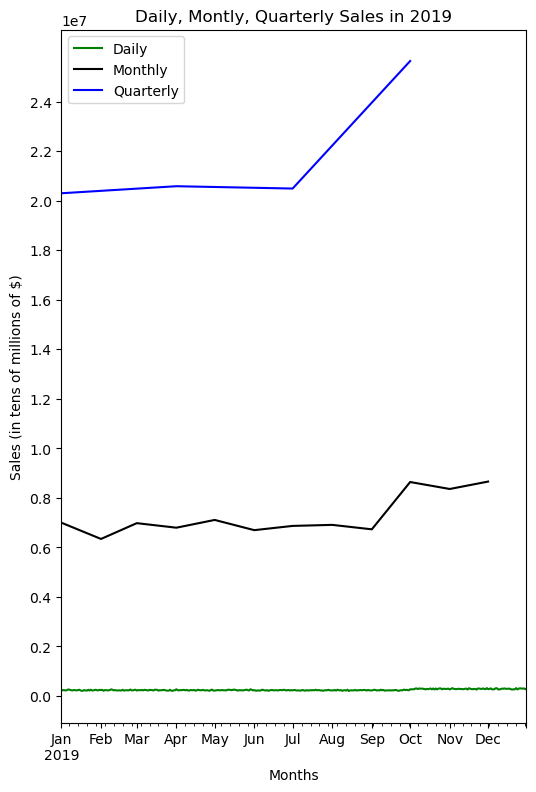

In [14]:
#Plot Day, Month, Quarter sales all in the same graph
#Set size title, ticks, labels and legend
daily.plot(title = "Daily, Montly, Quarterly Sales in 2019", ylabel = 'Sales (in tens of millions of $)', color = 'green', legend = True, label = 'Daily')
monthly.plot(color='black', legend = True, label = 'Monthly')
quarterly.plot(color='blue', xlabel = 'Months', legend = True, label = 'Quarterly', figsize = (6,9), yticks = np.arange(0, 25000000, 2000000))

<AxesSubplot:title={'center':'sales'}, xlabel='transactionDate'>

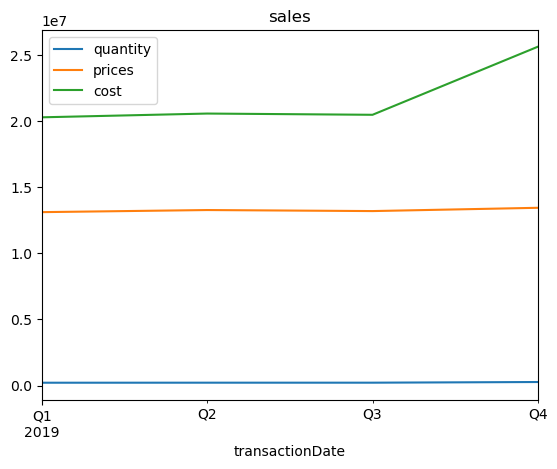

In [15]:
#an alternative way to plot, however it is hard to see the details
data_2019.groupby(pd.Grouper(freq='Q')).sum().plot(title ='sales')

<AxesSubplot:title={'center':'Daily Sales in 2019'}, xlabel='Months', ylabel='Sales (in $)'>

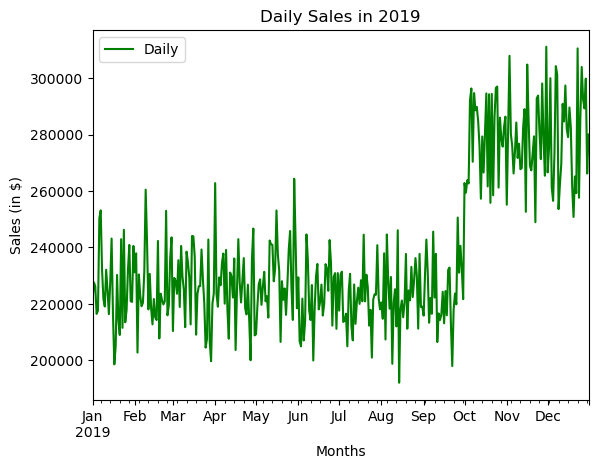

In [16]:
#Plotting only daily sales to see in more detail
daily.plot(title = "Daily Sales in 2019", xlabel = 'Months', ylabel = 'Sales (in $)', color = 'green', legend = True, label = 'Daily')

<AxesSubplot:title={'center':'Monthly Sales in 2019'}, xlabel='Months', ylabel='Sales (in tens of millions of $)'>

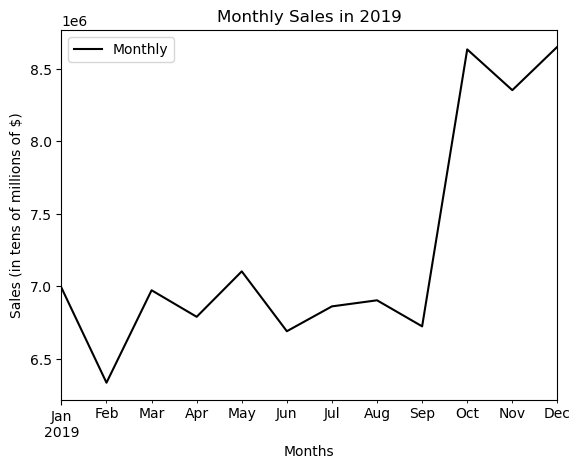

In [17]:
#Plotting only monthly sales to see in more detail
monthly.plot(title = "Monthly Sales in 2019", xlabel = 'Months', ylabel = 'Sales (in tens of millions of $)', color = 'black', legend = True, label = 'Monthly')

<AxesSubplot:title={'center':'Quarterly Sales in 2019'}, xlabel='Quarters', ylabel='Sales (in tens of millions of $)'>

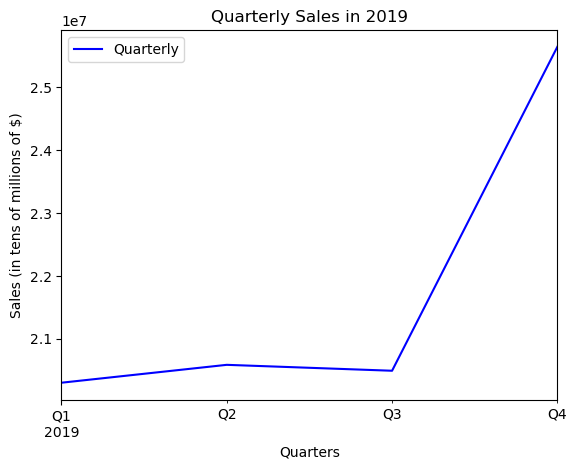

In [18]:
#Plotting only quarterly sales to see in more detail
quarterly.plot(title = "Quarterly Sales in 2019", xlabel = 'Quarters', ylabel = 'Sales (in tens of millions of $)', color = 'blue', legend = True, label = 'Quarterly')

## Question 5

A key metric for retail sales data is Average Purchase Value(APV).  APV measures the average value of each purchase made by your customers and will often compare that to the average number of units per transaction(ANU). The formula for APV is (Total Sales Revenue / Number of Customers or Transactions)

**(5a).** Calculate the Average Purchase Value for Q1 and Q4 of 2019. 

Q1 = \\$146.75 per customer, Q4 = $182.46 per customer

**(5b).** Calculate the average number of units per transaction for Q1 and Q4. 

Q1 = 1.5 units per transaction, Q4 = 1.9 units per transaction

**(5c).** Describe the differences between Q1 and Q4 values.  Speculate on possible causes for differences(Hint: Seasonality) 

There is a significant increase between Q1 and Q4, with Q4 being much higher in both APV and ANU. I believe the cause for this is because Q4 includes the holiday season, with many people buying gifts for family and friends. In addition, Q4 is also the beginning of the winter season, so customers may also want to purchase new shoes for the winter weather.

In [19]:
#creating new dataframes for Q1 2019 and Q4 2019
q1_2019 = data[data.transactionDate.between('2019-01-01', '2019-03-31')]
q4_2019 = data[data.transactionDate.between('2019-10-01', '2019-12-31')]
q1_2019 = q1_2019.sort_values('transactionDate', ascending=True)
q4_2019 = q4_2019.sort_values('transactionDate', ascending=True)

In [20]:
#finding APV of Q1 2019 by summing total sales and dividing by rows (total transactions)
q1totalSales = q1_2019['cost'].sum()
print(q1totalSales/q1_2019.shape[0])

146.75329320579286


In [21]:
#finding APV of Q4 2019 by summing total sales and dividing by rows (total transactions)
q4totalSales = q4_2019['cost'].sum()
print(q4totalSales/q4_2019.shape[0])

182.45593876984603


In [22]:
#finding ANU of Q1 2019 by summing total quantity sold and dividing by rows (total transactions)
q1totalTransactions = q1_2019['quantity'].sum()
print(q1totalTransactions/q1_2019.shape[0])

1.5485398636386642


In [23]:
#finding ANU of Q4 2019 by summing total quantity sold and dividing by rows (total transactions)
q4totalTransactions = q4_2019['quantity'].sum()
print(q4totalTransactions/q4_2019.shape[0])

1.9030522562785104


## Question 6

Shunique is looking to expand its distribution centers so that it can outperform Zappos on delivery time to customers.  It is important to know what states and regions are epicenters for high sales and you have been asked to present the following results.

**(6a)** Report 2020 Sales by state - Present results tabularly 

**(6b)** In Tableau create a Map visualization of total sales(2018 - 2020) by Region [Northeast, West, Midwest, South].

In [24]:
#pulled 2020 data, then groupby state and summed sorted the total sales 
data_2020 = data[data.transactionDate.between('2020-01-01', '2020-12-31')]
data_2020.groupby('state').agg({'cost':'sum'}).sort_values('cost', ascending = False)

,cost
state,
Texas,1238215.58
California,1219721.54
Florida,1143359.72
New York,1074477.72
Ohio,1021461.58
Virginia,1009027.82
Oklahoma,996220.92
Washington,994863.51
Georgia,988708.06


6b) Used Tableau to visualize total sales by Region. I made groups to represent the 4 regions and sorted states into each region. Then I summed based on region (by adding a layer). Lastly, I added color, title and axis labeling and placed on a dashboard.

<img src="./Dashboard Final.png" />

## Question 7

Use any type of plot to show the distribution of prices for the following shoe colors ('metallic', 'bronze', 'animal print', 'yellow')

In [25]:
#used groupby to sort colors by most sales. Then created a series to hold the colors we're looking for
colors = data.groupby('color').agg({'prices':'sum'})
selectedcolors = ['metallic', 'bronze', 'animal print', 'yellow']
colors

,prices
color,
animal print,1836515.76
beige,4411002.65
black,30341322.98
blue,6366710.08
bone,799616.47
bronze,505149.79
brown,8329143.81
burgundy,1205353.05
clear,164237.18


In [26]:
#used two for loops to iterate through the dataframe and series and remove any colors that weren't in the series. This left only the rows with the colors we're looking for in the dataframe
for x in colors.index:
    if x not in selectedcolors:
        colors = colors.drop(x)

#better alternative way
#colors = transactions[transactions['colors'].isin(['metallic', 'bronze', 'animal print', 'yellow'])]

<AxesSubplot:title={'center':'Distribution of Prices for Various Colors'}, xlabel='Color', ylabel='Total Sales (in Millions of $)'>

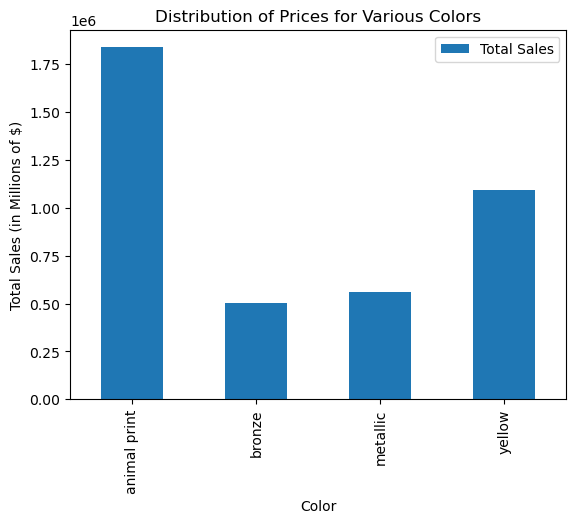

In [27]:
#plotted the remaining values in the dataframe, which were the rows containing sales with our selected colors. Chose to use a bar graph to represent data and added labels, titles, legends
colors.plot(y = 'prices', kind = 'bar', title = 'Distribution of Prices for Various Colors', xlabel ='Color', ylabel = 'Total Sales (in Millions of $)', legend = True, label = 'Total Sales')

## Question 8

The Shunique marketing team is desperate to find the next big shoe hit.  They have asked for your help. 

**(8a)** Select a unique combination of shoe attributes then create a summary report with various statistics (ie Average sales price, city with most sales, quarter with most shoes sold, Customer name with highest purchase, etc)[it is your choice].  If the shoe combo doesn't exist in the dataset then choose another combination.

Next quarter they are going to release an animal print, leather, strappy, basketball shoe.  

Looking for Green, Canvas, Leather Outsole, Boots - 

Average Sale Price: $68.95

City with the most sales: Lake Anthonyshire and Nicholastown

Quarter with most shoes sold: Q3 2019

Customer with highest purchase: Christine Lee	

In [28]:
#Decided to search for Green Canvas Leather Outsole Boots. Used loc method to specifically sort only those shoes and set index to transaction date
selectedshoe = data.loc[(data['color'] == 'green') & (data['materials'] == 'canvas') & (data['category'] == 'boots') & (data['feature'] == 'leather outsole')]
selectedshoe.info()
selectedshoe = selectedshoe.set_index('transactionDate')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 462632 to 462740
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   first_name       109 non-null    object        
 1   last_name        109 non-null    object        
 2   email            109 non-null    object        
 3   city             109 non-null    object        
 4   address          109 non-null    object        
 5   state            109 non-null    object        
 6   transactionDate  109 non-null    datetime64[ns]
 7   transactionID    109 non-null    object        
 8   time             109 non-null    object        
 9   quantity         109 non-null    int64         
 10  name             109 non-null    object        
 11  color            109 non-null    object        
 12  materials        109 non-null    object        
 13  prices           109 non-null    float64       
 14  feature          109 non-null    o

In [29]:
#Looking for average sales price by summing to the sales by the total number of shoes sold
totalcost = selectedshoe['cost'].sum()
totalsold = selectedshoe['quantity'].sum()
totalcost/totalsold

68.95000000000003

In [30]:
#looking for city with most sales by groupby city and sorting by sales
selectedshoe.groupby('city').sum().sort_values('cost', ascending=False)

,quantity,prices,cost
city,,,
Lake Anthonyshire,4,68.95,275.80
Nicholastown,4,68.95,275.80
Foxfurt,3,68.95,206.85
South Nicole,3,68.95,206.85
Port Christophermouth,3,68.95,206.85
...,...,...,...
North Gabriel,1,68.95,68.95
Nguyenmouth,1,68.95,68.95
Allenport,1,68.95,68.95


In [31]:
#looking for quarter with most shoes sold by using Grouper method to sum quarterly sales
quarterly_sales = selectedshoe.groupby(pd.Grouper(freq='Q'))['cost'].sum() 
quarterly_sales.sort_values(ascending=False)

transactionDate
2019-09-30    1999.55
2020-06-30    1861.65
2019-12-31    1723.75
2019-03-31    1585.85
2020-03-31    1379.00
2019-06-30     965.30
2018-12-31     965.30
2020-09-30     413.70
2018-09-30     275.80
Name: cost, dtype: float64

In [32]:
#looking for customer info with highest purchase by groupy email (to find unique customers), then sorting by most sales and saving to a new dataframe
customer = selectedshoe.groupby('email', as_index = False).sum().sort_values('cost', ascending=False)
customer

,email,quantity,prices,cost
0,alexander34@obrien.org,4,68.95,275.80
10,bsmith@grimes-jacobs.org,4,68.95,275.80
60,landrylinda@yahoo.com,3,68.95,206.85
16,danielsmith@gmail.com,3,68.95,206.85
12,charlesbarker@hotmail.com,3,68.95,206.85
...,...,...,...,...
56,kdeangelisp5@dion.ne.jp,1,68.95,68.95
55,karathompson@gmail.com,1,68.95,68.95
25,gardnerpaul@gmail.com,1,68.95,68.95
26,greenmary@gmail.com,1,68.95,68.95


In [33]:
#use the new dataframe which is sorted by highest customer purchase and using the email field, use the current dataframe to provide user information
data.loc[(data['email'] == customer.at[0,'email'])]

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
462700,Christine,Lee,alexander34@obrien.org,Nicholastown,89187 Julie Neck Suite 849,Ohio,2019-12-19,a0ff58ee-35fd-491a-aa63-604817103f41,08:05 AM,4,Women's Carlos by Carlos Santana Cornelia Stra...,green,canvas,68.95,leather outsole,boots,275.8,2019-12-19


## Question 9

**(9a)** Are there opportunities to grow sales?  

**(9b)** Are there products that you would discontinue? 

**(9c)** What other datasets would you use to complement the transaction data and why?

In [34]:
df2.tail()

,quantity,prices,cost
name,,,
"Trotters 1650 Womens Black Patent Leather Heels Pumps Shoes 7 Wide (c,d,w) Bhfo",17,7.92,16.83
Mix No 6 Sarti Women Us 8 Green Platform Heel Pre Owned 1650,17,9.90,16.83
Kensie Veronica Women Us 8.5 Blue Sneakers Pre Owned 1906,16,7.92,15.84
Bella Vita Sangria Women Us 7.5 N/s White Wedge Sandal Blemish 1903,13,10.89,12.87
Guess Ortena2 Bronze/black Ankle Booties Boots Size 6.5,10,0.06,0.10


9a) There are defintiely opportunties to grow sales. For example, in the District of Columbia, only 2,770 pairs of shoes sold from Aug 2018 to Aug 2020. Meanwhile, the state that sold the next most shoes, Hawaii, sold 33,382 pairs of shoes. The company could target ads and sales for the District of Columbia to increase sales in that region. In addition, this shoe company sells shoes in a variation of colors and materials. Providing customers with additional material and color choices could help increase sales by allowing customers to customize their look.

9b) I would discontinue products that have sold the least as the data shows they are unpopular. For example, the Jessica Simpson Women's Sesley Suede Olive Taupe Ankle-high Suede Boot - 10 has only been bought twice from Aug 2018 to Aug 2020. In addition, it would be helpful to have data that would allow Shunique to see the cost of each unit. With that data, we could compare it to price of the shoe and the numbers sold to calculate the profit per unit. We would then have a clear picture of which shoes are providing the most profit focus our inventory on these high profit shoes.

9c) I believe having data on the cost to purchase the shoe from the manufacturer. As mentioned above, by knowing the cost per shoe, we are able to find the profit margin of each shoe. In addition, I believe another data point that would be useful is knowing the size of the shoe bought. By knowing which shoe sizes are most common, we can have insight on the quantities that should be purchased for each size and focus our building an efficient inventory. In the long run, this can lower the cost of doing business and raise profits for Shunique.

## Question 10

The sales team is asking for increased bonuses because they increased daily sales year-over-year. 

**(10)** Calculate the daily sales totals (cost) for the date ranges 8/1/2018-7/31/2019 and 8/1/2019-7/31/2020. Describe and compare the two distributions (center, variability, spread, and anomalies). Create a graphical display that makes this easy to understand.

In [41]:
#make new dataframe with the first selected timeframe. Use describe method to find distribution data
y1 = data[data.transactionDate.between('2018-08-01', '2019-07-31')]
y1['cost'].describe()

#did this wrong need to check

count    543675.000000
mean        146.596477
std         254.363343
min           0.010000
25%          50.970000
50%          88.590000
75%         158.000000
max       17080.000000
Name: cost, dtype: float64

In [42]:
y1.head()

,first_name,last_name,email,city,address,state,transactionDate,transactionID,time,quantity,name,color,materials,prices,feature,category,cost,Date
0,Ximenes,Oxshott,xoxshott0@biglobe.ne.jp,Idaho Falls,5 Pearson Plaza,Idaho,2019-04-04,6e3e9c86-2251-44bc-8249-8045e5406cca,7:07 PM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-04-04
1,Urson,Wilcox,uwilcox2w@weather.com,Lima,8 Muir Road,Ohio,2019-02-03,aaacafb6-112c-41ad-baf1-44b54b17170b,3:21 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-02-03
2,Svend,De la Feld,sdelafeld58@last.fm,Wilmington,0 5th Pass,Delaware,2019-07-21,3727a9ae-9914-421c-9adc-eb4f1dd010f4,5:04 AM,2,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,119.90,2019-07-21
3,Laura,Potts,bmartin@scott-carr.info,Rodriguezmouth,03918 Rachel Meadows Apt. 214,Wisconsin,2019-01-26,649691c5-a77f-4ae2-bee1-4894a03b2dd3,06:26 PM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-01-26
5,Mitchell,Johnson,jessicathomas@hotmail.com,West Sheila,63427 Murray Inlet,Texas,2019-07-05,9ea94b87-eebd-46ce-b8eb-fc9212270fcd,10:49 AM,1,'waffle Spa Slide' Slipper (women),green,leather,59.95,recycled material,wedges,59.95,2019-07-05


In [43]:
#make new dataframe with the second selected timeframe. Use describe method to find distribution data
y2 = data[data.transactionDate.between('2019-08-01', '2020-07-31')]
y2['cost'].describe()

count    560150.000000
mean        155.353486
std         268.289196
min           0.010000
25%          51.950000
50%          89.000000
75%         168.000000
max       21350.000000
Name: cost, dtype: float64

/Users/samuelchan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


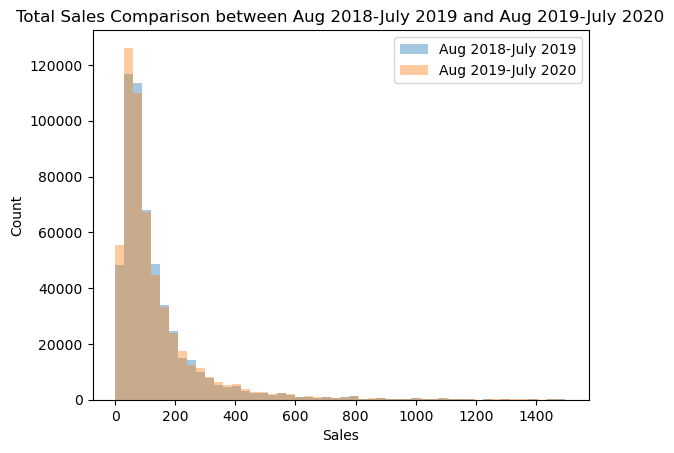

In [44]:
#distribution plot with both timeframes, and only showing data less than $1500 as it tapers off
ax = sns.distplot(y1['cost'][y1['cost'] < 1500], label="Aug 2018-July 2019", kde=False)
sns.distplot(y2['cost'][y2['cost'] < 1500], label="Aug 2019-July 2020", kde=False)
ax.set(xlabel='Sales', ylabel='Count', title='Total Sales Comparison between Aug 2018-July 2019 and Aug 2019-July 2020')
plt.legend()
plt.show()

## Question 11

Looking at the summary, the CEO says the sales don't look that different. 

**(11)** Is the difference in sales statistically significant enough to justify increased bonuses? (Answer using inference, either a significance test or comparison of confidence intervals)

Hypotheses:

**H<sub>0</sub>**: $\mu$<sub>2020</sub> - $\mu$<sub>2019</sub> = 0

(there is no difference in sales)

**H<sub>a</sub>**: $\mu$<sub>2020</sub> - $\mu$<sub>2019</sub> > 0

(the sales in 2020 were greater than in 2019)

In [45]:
#use stats method with both timeframes to find p-value
stats.ttest_ind(y2['cost'], y1['cost'], equal_var=False)

Ttest_indResult(statistic=17.602040404669047, pvalue=2.428660370325689e-69)

#### Conclusion
Because the p-value 2.428 is less than our significance level .05, we do have convincing evidence against the null hypothesis. The data does support the claim that sales increased from 2019 to 2020.